<a href="https://colab.research.google.com/github/zzhenxi/CP2/blob/main/jh_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업 목록 

1.  **셀럽이 어떻게 활동해야 팬들이 좋아하는지 분석**
    - 상위 n퍼센트에 속하는 셀럽에 대한 분석과 시각화 자료
        
        `그래프로 (직관적으로) 보여주는 것에 중점`
        
        - 셀럽이 먼저 대화를 시작한 경우 비율 (날짜별로)
        - 셀럽의 태도에 따른 시간의 흐름에 따른 긍정도 변화의 시각화
        - 시간의 흐름에 따른 셀럽의 말에 대한 팬의 응답률
            
            → 이렇게 했더니 팬의 응답률이 올라갔다고 제시하기 위함
            
        - 시간의 흐름에 따른 긍정도 변화 선그래프
            
             → 이렇게 했더니 팬의 긍정도가 올라갔다고 제시하기 위함

- 아쉬운 부분 : 🥺 표시
- 그래프 사용 색 :    
https://colorhunt.co/palette/fff8cdffe05dff9642646464

## 한국어 폰트 설치, 경고 무시 등

In [1]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 한국어 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and di

## 데이터 가져오기
- data : 모든 데이터 목록

In [3]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [4]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv("/content/drive/MyDrive/AIB_PJ2/dataset/[jh]labeled_data_0113_new.csv", keep_default_na=False)

In [6]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1) 

In [7]:
data

,date,time,celeb,code,comments,file,label
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,,1
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,,2
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,,1
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,,1
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,,1
...,...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,,1
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,,1
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,,1
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,,1


In [8]:
data_info = pd.read_excel("/content/drive/MyDrive/AIB_PJ2/dataset/계정 정보 및 설문조사.xlsx", sheet_name="계정 정보", keep_default_na=False)

In [9]:
data_surv = pd.read_excel("/content/drive/MyDrive/AIB_PJ2/dataset/계정 정보 및 설문조사.xlsx", sheet_name="설문조사", keep_default_na=False)

## 데이터 전처리 

### data_info   
- data_info -> celeb_li, user_li

In [10]:
data_info

,셀럽 계정,테스트 계정
0,VAYA,BYZG
1,WKDG,XPBD
2,XMSQ,YQVX
3,CJSL,YSUL
4,DQZB,RLGI
5,JLDN,QOGI
6,OSQR,IYWE
7,JSEU,MDYT
8,LOVM,SLYG
9,JOPU,SNLX


In [11]:
# 각각 계정 리스트 안에 넣기 
celeb_li = list(np.array(data_info['셀럽 계정'].to_list()))
celeb_li = [id for id in celeb_li if id != ''] # 공백 없애기, user_li의 경우 공백은 없을 확률이 높으므로 따로 코드 추가 x

user_li = list(np.array(data_info['테스트 계정'].to_list()))


### data_surv
- 추천점수 부분이 없는, 공백(null)값을 포함한 행 제거
- 셀럽별 / 유저별 survey 분리
- data_surv_score : 추천 점수가 있는 항목
- data_surv_pay : 얼마 낼 의향인지 가격이 있는 항목

In [12]:
data_surv.columns

Index(['코드', '추천 점수', '점수 이유', '지불 의사 금액', '플랫폼 수수료', '추가 요청 기능', '기타 의견'], dtype='object')

In [13]:
data_surv_score = data_surv[data_surv['추천 점수'] != '']

In [14]:
data_surv_score.head()

,코드,추천 점수,점수 이유,지불 의사 금액,플랫폼 수수료,추가 요청 기능,기타 의견
0,KAMF,10,만족해서,"월 10,000원 이상 ~30,000원 미만",5% 이상 ~ 10% 미만,톡 알림 끄고 키기,넹
1,MLSC,8,셀럽과 대화가 가능한데 단톡방과는 다른 개별 대화같은느낌. 서로 부담없이 가능한 대화.,"월 30,000원 이상 ~50,000원 미만",5% 이상 ~ 10% 미만,인스타그램 피드처럼 셀럽에게만 보이는 포스트기능이 있으면 좋겠네요.,"앱이 많이 느려서 실행하면 기다림이 잦고, 셀럽이 메시지를 보내도 알림이 안 떠요...."
2,ZSOS,7,1대1처럼 대화를 하는 점이 좋으나 아직 오류가 많기 때문에,"월 3,000원 미만",5% 미만,캡쳐 기능이 있었으면 좋겠습니다,대화내용이 사라지거나 알람이 늦게 오는 오류들만 없어지면 좋겠습니다
3,GUKR,9,메시지가 셀럽에게만 보여져서 좋고 톡방에 여러명이 있어도 귓속말 답변도 받을 수 있...,"월 3,000원 미만",5% 미만,카톡처럼 이모티콘 사용이 가능했으면 좋겠어요,셀랍 방에 대화 내용을 살펴보려고 내리면 대화내용이 안 보이는 경우가 있어요
4,VAYA,7,현재는 불안정한 요소들이 많아서 더 개선되면 좋다고 생각합니다,"월 3,000원 미만",5% 이상 ~ 10% 미만,일단은 안정성만 더 좋아도 될 것 같아오,팬들과 소통을 중요하게 생각하는 셀럽들에겐 되게 좋은 어플


In [15]:
data_surv_pay = data_surv[data_surv['지불 의사 금액'] != '']

In [16]:
data_surv_pay.head()

,코드,추천 점수,점수 이유,지불 의사 금액,플랫폼 수수료,추가 요청 기능,기타 의견
0,KAMF,10,만족해서,"월 10,000원 이상 ~30,000원 미만",5% 이상 ~ 10% 미만,톡 알림 끄고 키기,넹
1,MLSC,8,셀럽과 대화가 가능한데 단톡방과는 다른 개별 대화같은느낌. 서로 부담없이 가능한 대화.,"월 30,000원 이상 ~50,000원 미만",5% 이상 ~ 10% 미만,인스타그램 피드처럼 셀럽에게만 보이는 포스트기능이 있으면 좋겠네요.,"앱이 많이 느려서 실행하면 기다림이 잦고, 셀럽이 메시지를 보내도 알림이 안 떠요...."
2,ZSOS,7,1대1처럼 대화를 하는 점이 좋으나 아직 오류가 많기 때문에,"월 3,000원 미만",5% 미만,캡쳐 기능이 있었으면 좋겠습니다,대화내용이 사라지거나 알람이 늦게 오는 오류들만 없어지면 좋겠습니다
3,GUKR,9,메시지가 셀럽에게만 보여져서 좋고 톡방에 여러명이 있어도 귓속말 답변도 받을 수 있...,"월 3,000원 미만",5% 미만,카톡처럼 이모티콘 사용이 가능했으면 좋겠어요,셀랍 방에 대화 내용을 살펴보려고 내리면 대화내용이 안 보이는 경우가 있어요
4,VAYA,7,현재는 불안정한 요소들이 많아서 더 개선되면 좋다고 생각합니다,"월 3,000원 미만",5% 이상 ~ 10% 미만,일단은 안정성만 더 좋아도 될 것 같아오,팬들과 소통을 중요하게 생각하는 셀럽들에겐 되게 좋은 어플


## 상위 n개의 셀럽 목록, 팬의 숫자 
- 상위 n개의 셀럽 정하는 기준 
- 대화방에서 팬의 수 방의 참여자 만족도가 높은 순(셀럽, 팬 합쳐서) / 방의 활성화 순서 (인당 대화가 많은 순서) (전체 대화 / 참여자수) / 방의 부정도가 가장 낮은

### (1) 참여도가 높은 방 순서
- top10_li

In [17]:
# 대화방 참여자가 총 몇명인지 어떻게 알아낼까? -> celeb별 대화 참여자 unique값 찾기, 총 참여자 수
# celeb unique 값 찾기 # 따로 받은 celeb_li와 순서와 내용이 같음.
# a = list(data['celeb'].unique())
# 따라서 굳이 따로 구할 필요 없음 -> 이건 나중에 필요할때 다시 활용

In [18]:
# 셀럽별 대화방 참여자 총 몇명 (unique)
user_dic = {} # [celeb : 유저들 unique 값 리스트]
for id in celeb_li:
  val = list(data[data['celeb'] == id]['code'].unique())
  user_dic[id] = val

In [19]:
# 셀럽별 대화 총 몇개 
com_dic = {} # [celeb : 유저들 comments 개수]
for id in celeb_li:
  val = len(data[data['celeb'] == id]['comments'])
  com_dic[id] = val

In [20]:
# 셀럽별 대화방 활성화 정도
act_dic = {} # 얼마나 acitve 한지 
for id in celeb_li:
  user_num = len(user_dic[id]) # user_num : 유저 몇명?
  com_num = com_dic[id] # com_num : comments 몇개?
  act_dic[id] = round(com_num/user_num, 3) # 유저 / 총 대화 수로 acitve한 정도를 구해줍니다.

In [21]:
# act_dic을 바탕으로 상위 n 퍼센트를 구합니다. 
act_dic

{'CJSL': 31.13,
 'DQZB': 10.065,
 'JLDN': 26.086,
 'JOPU': 16.875,
 'JSEU': 4.9,
 'LOVM': 17.6,
 'OSQR': 5.867,
 'VAYA': 126.708,
 'WKDG': 51.818,
 'XMSQ': 73.548}

In [22]:
# dictionary active가 높은 순서대로 만들기 
sorted_dict = {}
for k, v in sorted(act_dic.items(), key = lambda item: item[1], reverse = True):
  sorted_dict[k] = v

# 코드 참고 https://codechacha.com/ko/python-sorting-dict/

In [23]:
# top 10 celeb list
top10_li1 = list(sorted_dict.keys())[:10]

In [24]:
top10_li1

['VAYA',
 'XMSQ',
 'WKDG',
 'CJSL',
 'JLDN',
 'LOVM',
 'JOPU',
 'DQZB',
 'OSQR',
 'JSEU']

### (2) 부정도가 낮은 방 순서
- top10_li

In [25]:
a = data.groupby(['celeb', 'label']).count()

In [26]:
# data_012는 셀럽에 따라 0이 몇개, 1이 몇개, 2가 몇개인지 정리해놓은 dataframe
data_012 = a[['date']]

In [27]:
data_012.head()

date
celeb label      
CJSL  0        16
      1      1574
      2        91
DQZB  0         3
      1       300

In [28]:
# pivot_table로 보기 편하게 바꿔주기 / 0이 없는 곳은 0.001으로 자리 자동으로 메꿔줌 (fill_value) 
# 0.0001로 메꿔주는 이유 : 부정도가 0이면, 총합에 나누기를 할 수가 없으므로 최대한 작은 수로 나눠줘서 점수를 올려줌
data_012 = pd.pivot_table(data_012,
                       index='celeb',
                       columns='label',
                       fill_value = 0.001)

In [29]:
# 멀티 인덱스 해제 - 컬럼명 수정
data_012.columns = [0, 1, 2]

In [30]:
# 총합 컬럼
data_012['sum'] = data_012[[0, 1, 2]].sum(axis=1)
data_012

,0,1,2,sum
celeb,,,,
CJSL,16.000,1574,91,1681.000
DQZB,3.000,300,9,312.000
JLDN,5.000,842,66,913.000
JOPU,1.000,120,14,135.000
JSEU,3.000,42,4,49.000
LOVM,0.001,86,2,88.001
OSQR,2.000,83,3,88.000
VAYA,28.000,1351,1662,3041.000
WKDG,6.000,1480,224,1710.000


In [31]:
# 부정도 컬럼 추가 
data_012['div'] = data_012['sum']/data_012[0]

In [32]:
data_012

,0,1,2,sum,div
celeb,,,,,
CJSL,16.000,1574,91,1681.000,105.062500
DQZB,3.000,300,9,312.000,104.000000
JLDN,5.000,842,66,913.000,182.600000
JOPU,1.000,120,14,135.000,135.000000
JSEU,3.000,42,4,49.000,16.333333
LOVM,0.001,86,2,88.001,88001.000000
OSQR,2.000,83,3,88.000,44.000000
VAYA,28.000,1351,1662,3041.000,108.607143
WKDG,6.000,1480,224,1710.000,285.000000


In [33]:
data_012 = data_012.sort_values(by=["div"], ascending=[False]) 

In [34]:
top10_li2 = list(data_012.index)[:10]
top10_li2

['LOVM',
 'XMSQ',
 'WKDG',
 'JLDN',
 'JOPU',
 'VAYA',
 'CJSL',
 'DQZB',
 'OSQR',
 'JSEU']

### (3) 채팅 수가 많은 방 순서

In [35]:
data_many = data
data_many = data_many.groupby('celeb').count().reset_index()
data_many = data_many[['celeb', 'date']]
data_many = data_many.sort_values(by=['date'], axis=0, ascending=False)

In [36]:
top10_li3 = data_many.celeb.reset_index(drop=True).tolist()

### (4) 1, 2, 3번 조합
- 1번 : 순위가 높은 순서대로 10점씩 부과 
- 2번 : 순위가 높은 순서대로 8점씩 부과
- 3번 : 순위가 높은 순서대로 8점씩 부과
- merged_top10

In [37]:
# 각각 점수 부여

# 참여도가 높은 방 순서
top10_li_1 = pd.DataFrame({'ID':top10_li1,
                             'score':[100, 90, 80, 70, 60, 50, 40, 30, 20, 10]})

# 부정도가 낮은 방 순서
top10_li_2 = pd.DataFrame({'ID':top10_li2,
                             'score':[80, 72, 64, 56, 48, 40, 32, 24, 16, 8]})

# 채팅 수가 많은 방 순서
top10_li_3 = pd.DataFrame({'ID':top10_li3,
                             'score':[80, 72, 64, 56, 48, 40, 32, 24, 16, 8]})

In [38]:
# merge
merged_top10 = pd.merge(left = top10_li_1 , right = top10_li_2, how = "outer", on='ID')
merged_top10 = pd.merge(left = merged_top10 , right = top10_li_3, how = "outer", on='ID')

In [39]:
merged_top10.head()
# 예시에서는 NaN값이 나오지 않지만 만약 나오는 경우에는 결측치를 0으로 대체해주기!

,ID,score_x,score_y,score
0,VAYA,100,40,80
1,XMSQ,90,72,72
2,WKDG,80,64,64
3,CJSL,70,32,56
4,JLDN,60,56,48


In [40]:
# 점수 총합 
merged_top10['sum'] = merged_top10['score_x']+merged_top10['score_y']+merged_top10['score']
merged_top10.head()

,ID,score_x,score_y,score,sum
0,VAYA,100,40,80,220
1,XMSQ,90,72,72,234
2,WKDG,80,64,64,208
3,CJSL,70,32,56,158
4,JLDN,60,56,48,164


In [41]:
# 마지막으로 sum값을 기준으로 top 순서 구하기
merged_top10 = merged_top10.sort_values(by=["sum"], ascending=[False]) 
merged_top10.head()

,ID,score_x,score_y,score,sum
1,XMSQ,90,72,72,234
0,VAYA,100,40,80,220
2,WKDG,80,64,64,208
4,JLDN,60,56,48,164
3,CJSL,70,32,56,158


In [42]:
# top10의 ID를 list안에 넣기
top10_list = list(merged_top10['ID'])

# top10에 해당하는 셀럽들의 행만 불러오기 (데이터를 받지 못했으므로, 필요없는 Part)
data_isin = data
data_isin = data_isin[data_isin['celeb'].isin(top10_list)]

### (5) 사용자 지정 정렬 함수 만들기
- top10순서에 따라 정렬하기 위해 

In [43]:
from pandas.api.types import CategoricalDtype

sort_order = CategoricalDtype(
    top10_list, 
    ordered=True
)

In [44]:
# 함수로 만들어주기
def sort_top10(df):
  df['celeb'] = df['celeb'].astype(sort_order)
  df = df.sort_values('celeb')
  return df

## 상위 n명에 대한 시각화
- 셀럽의 태도 기준
    - 셀럽이 먼저 대화를 시작한 비율
    - 평균 하루 대화량 
    - 요일별, 시간별 대화 분포 (애매함)

### (1) 셀럽과 팬의 대화 비율
1. 셀럽이 먼저 대화를 시도한 비율 (bar chart)
  - 대화를 먼저 시작한 날짜 / 전체 대화 날짜 * 100
  - 셀럽 각각 비교

2. 셀럽과 팬의 대화 비율 평균 (stackted bar chart)
  - top 10 셀럽 대화 비율 
  - 셀럽 각각 비교 (전체 대화중에 셀럽의 대화가 얼마나 되는지)

3. 주별 보내는 첨부파일의 양 평균 (scatter plot)
  - top 10 셀럽 첨부파일의 양 평균
  - top 10 셀럽 활성도 (참여도가 높은 방 순서)에 이미 구해놓음
  - 🥺 이건 top 10 뿐만 아니라, 모든 데이터를 대상으로 해도 좋은 결과가 나올 수 있을 듯!


#### 1. 셀럽이 먼저 대화를 시도한 비율 (bar chart)
top3 셀럽은 어떠한 노력을 하고 있을까?
  - 대화를 먼저 시작한 날짜 / 전체 대화 날짜 * 100
  - 셀럽 각각 비교

In [45]:
### 전처리 ###
# "님이 참여했습니다." 가 포함된 text 지우기 
# null 값 지우기 

data_isin = data
data_start = data_isin.dropna(subset = ['comments']) # comments컬럼을 기준으로 결측값 있는 행 drop
data_start = data_start.drop('file', axis=1) # file 컬럼 삭제
drop_index = data_start[data_start['comments'].str.contains('님이 참여했습니다.')].index
data_start = data_start.drop(index=drop_index)

In [46]:
'''
[note]
- x의 형태는 dataframe (묶인 그룹별로의 df가 들어가게 됨.)
- groupby 후, 함수를 적용해주는 방법 이용 
- 날짜별로 셀럽이 먼저 대화를 시도 했을 경우, yes 아니면 no가 들어간다. (🥺 하지만, 12시가 넘은 밤에 대화를 했을 경우도 생각해야 함.)
'''

def func(x):
  d = {}
  if 'Operator' in  x.iloc[0]['comments'] :
    d['yes/no'] = 'yes'
  else :
    d['yes/no'] = 'no'

  return pd.Series(d, index=['yes/no'])
  

In [47]:
data_start_yesno = data_start.groupby(['celeb', 'date']).apply(func)
data_start_yesno

yes/no
celeb date             
CJSL  2021-06-12    yes
      2021-06-13     no
      2021-06-14     no
      2021-06-15    yes
      2021-06-16     no
...                 ...
XMSQ  2021-08-15     no
      2021-08-16     no
      2021-08-17     no
      2021-08-18     no
      2021-08-19     no

[294 rows x 1 columns]

In [48]:
data_start_yesno = data_start_yesno.groupby(['celeb', 'yes/no']).size().unstack(fill_value=0)

# yes 퍼센트 구해주기
data_start_yesno['yes_persent'] = (data_start_yesno['yes']/(data_start_yesno['no'] + data_start_yesno['yes'])) * 100

# 인덱스 열로 바꿔주기
data_start_yesno['celeb'] = data_start_yesno.index
data_start_yesno = data_start_yesno.reset_index(drop=True)

# data_start_yesno 정렬하기 
# 위에서 만든 사용자 지정 정렬(sort_top10)을 활용하자. 
data_start_yesno = sort_top10(data_start_yesno)

data_start_yesno.head()

yes/no,no,yes,yes_persent,celeb
9,33,7,17.500000,XMSQ
7,32,7,17.948718,VAYA
8,37,5,11.904762,WKDG
2,24,15,38.461538,JLDN
0,32,36,52.941176,CJSL


No handles with labels found to put in legend.


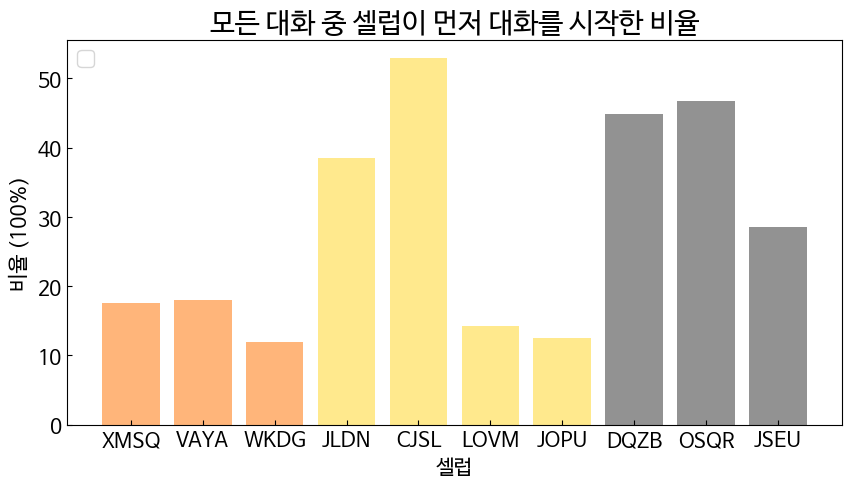

In [49]:
import matplotlib.pyplot as plt
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10 ,5)
plt.rcParams['font.size'] = 15
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

colors = ['#FF9642', '#FF9642', '#FF9642', '#FFE05D', '#FFE05D', '#FFE05D', '#FFE05D', '#646464', '#646464', '#646464']
ax1.bar(data_start_yesno['celeb'], data_start_yesno['yes_persent'], linewidth=5, alpha=0.7, color=colors)
# ax1.set_ylim(0, 18)
ax1.set_xlabel('셀럽')
ax1.set_ylabel('비율 (100%)')
ax1.tick_params(axis='both', direction='in')

ax1.patch.set_visible(False)

ax1.legend(loc='upper left')

# 제목 
plt.title('모든 대화 중 셀럽이 먼저 대화를 시작한 비율',fontsize=20) 
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

plt.show()

- 상위 셀럽들은 12시를 기점으로 먼저 대화를 하지 않은 것으로 나타났다. 

#### 2. 셀럽과 팬의 대화 비율 평균 (stackted bar chart)
top 3 셀럽의 대화 비율은 어떻게 될까?
  - 셀럽별 대화 비율
  - 1:1 대화 비율
  - 셀럽 각각 비교 (전체 대화중에 셀럽의 대화가 얼마나 되는지)

In [50]:
data_ratio = data_isin.dropna(subset = ['comments']) # comments컬럼을 기준으로 결측값 있는 행 drop
data_ratio = data_ratio.drop('file', axis=1) # file 컬럼 삭제
drop_index = data_ratio[data_ratio['comments'].str.contains('님이 참여했습니다.')].index
data_ratio = data_ratio.drop(index=drop_index)

In [51]:
data_ratio.head()

,date,time,celeb,code,comments,label
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,2
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,1
6,2021-07-12,20:42,VAYA,VAYA,Operator오우오우,1
7,2021-07-12,20:42,VAYA,MLSC,그건 아닌가보네요.,1
8,2021-07-12,20:42,VAYA,VAYA,Operator껄껄,1


In [52]:
data_ratio = data_ratio.groupby(['celeb', 'code']).count().reset_index()

data_ratio = data_ratio.drop(["time", "comments"], axis=1)

# top10 정렬 해주기
data_ratio = sort_top10(data_ratio)

### celeb
data_ratio_cel = data_ratio[data_ratio['celeb'] == data_ratio['code']]
cel_mean = data_ratio.groupby('celeb').mean().reset_index()

### user
# temporary index
tem_index = data_ratio_cel.index

# 위 인덱스를 기반으로 셀럽에 해당하는 행들 다 걸러주기 (유저들만 남기기)
data_ratio_user = data_ratio.drop(tem_index)

# 너무 적게 보낸 유령 유저들 삭제 (메세지 2개 이하)
data_ratio_user = data_ratio_user.drop(data_ratio_user[data_ratio_user['date'] <= 2].index)

# user 인당 평균을 구해야 함
user_mean = data_ratio_user.groupby('celeb').mean().reset_index()
user_sum = data_ratio_user.groupby('celeb').sum().reset_index()

### both
data_ratio_all = data_ratio.groupby(['celeb']).sum().reset_index()

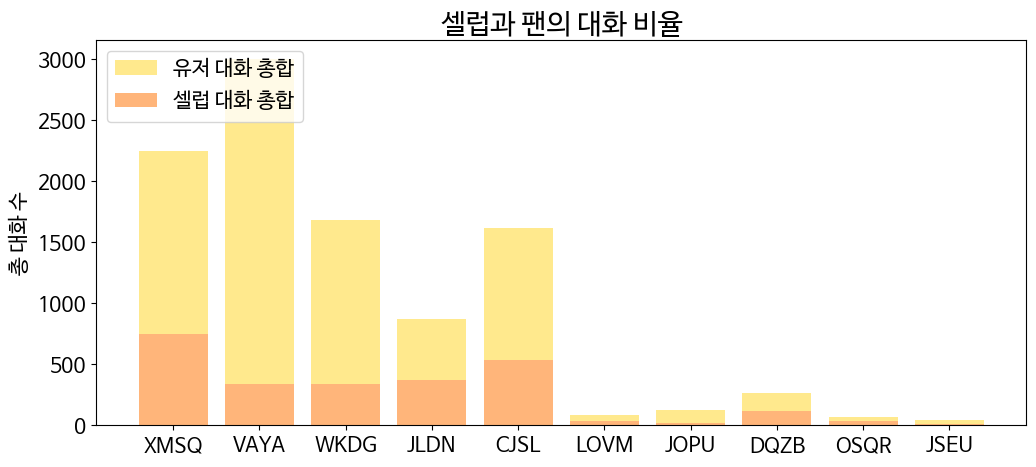

In [53]:
# 시각화

fig = plt.figure(figsize=(12,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.bar(user_sum['celeb'], user_sum['date'], bottom=data_ratio_cel['date'], color='#FFE05D', linewidth=5, alpha=0.7, label = '유저 대화 총합')
ax.bar(data_ratio_cel['celeb'], data_ratio_cel['date'], color='#FF9642', linewidth=5, alpha=0.7, label = '셀럽 대화 총합')
ax.set_ylabel('총 대화 수')

plt.title('셀럽과 팬의 대화 비율',fontsize=20)
ax.set_facecolor('white')

ax.legend(loc='upper left')
plt.show()

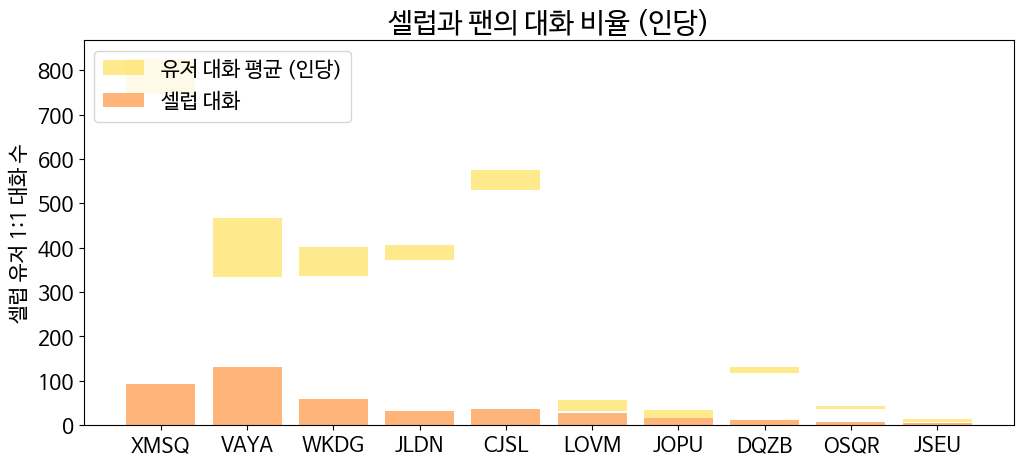

In [92]:
# 셀럽과 팬의 대화 비율
# 누적 바차트 그리기 (인당 대화량)
# 아래 : 셀럽 / 위: 유저

fig = plt.figure(figsize=(12,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.bar(user_mean['celeb'], user_mean['date'], bottom=data_ratio_cel['date'], color='#FFE05D', linewidth=5, alpha=0.7, label = '유저 대화 평균 (인당)')
ax.bar(cel_mean['celeb'], cel_mean['date'], color='#FF9642', linewidth=5, alpha=0.7, label = '셀럽 대화')
ax.set_ylabel('셀럽 유저 1:1 대화 수')

plt.title('셀럽과 팬의 대화 비율 (인당)',fontsize=20)

ax.legend(loc='upper left')
plt.show()

#### 3. 주별 보내는 첨부파일의 양 평균 (scatter plot)
첨부파일이 많을 수록, 채팅방의 활성화 정도가 올라간다?
  - top 10 셀럽 첨부파일의 양 평균
  - top 10 셀럽 활성도 (참여도가 높은 방 순서)에 이미 구해놓음 (act_dic)
  - 🥺 이건 top 10 뿐만 아니라, 모든 데이터를 대상으로 해도 좋은 결과가 나올 수 있을 듯!

In [55]:
data_file = data_isin
data_file = data_file[data_file['celeb'] == data_file['code']]
data_file = data_file[data_file['file'] != '']

In [56]:
data_file.head()

,date,time,celeb,code,comments,file,label
3103,2021-07-09,13:37,WKDG,WKDG,,Img 1625805447828,1
3228,2021-07-11,21:24,WKDG,WKDG,,Img 1626006267341,1
3289,2021-07-12,12:50,WKDG,WKDG,,Img 1626061827922,1
3324,2021-07-13,19:58,WKDG,WKDG,,Img 1626173932372,1
3357,2021-07-14,15:56,WKDG,WKDG,,Img 1626245795882,1


In [57]:
data_file['date'] = pd.to_datetime(data_file['date'])
data_file = data_file[['celeb', 'date', 'file']]
data_file.head()

,celeb,date,file
3103,WKDG,2021-07-09,Img 1625805447828
3228,WKDG,2021-07-11,Img 1626006267341
3289,WKDG,2021-07-12,Img 1626061827922
3324,WKDG,2021-07-13,Img 1626173932372
3357,WKDG,2021-07-14,Img 1626245795882


In [58]:
data_file = data_file.groupby('celeb').resample('W', on='date').count()
data_file = data_file[['file']]
data_file = data_file.reset_index()
data_file.head()

,celeb,date,file
0,CJSL,2021-06-13,5
1,CJSL,2021-06-20,18
2,CJSL,2021-06-27,12
3,CJSL,2021-07-04,5
4,CJSL,2021-07-11,5


In [59]:
# 셀럽 별 일주일에 평균 몇개의 사진을 보냈는가
# data_file_result
data_file_res = data_file.groupby(['celeb']).mean()

In [60]:
# 활성화 정도와 주 평균 파일 전송량을 dataframe으로 만들어 준다.
data_file_res = data_file_res.reset_index()

In [61]:
act_df = pd.DataFrame(list(act_dic.items()), columns=['celeb', 'active'])

In [62]:
act_df

,celeb,active
0,VAYA,126.708
1,WKDG,51.818
2,XMSQ,73.548
3,CJSL,31.130
4,DQZB,10.065
5,JLDN,26.086
6,OSQR,5.867
7,JSEU,4.900
8,LOVM,17.600
9,JOPU,16.875


In [63]:
# scatter plot을 만들기 위해 두개 merge 해주기 
merged_scatter = pd.merge(data_file_res, act_df, how='right', on='celeb')

merged_scatter = merged_scatter.fillna(0)

# 이상치 제거 
# VAYA 의 경우, 팬들의 충청심이 높아 사진 한장 보내지 않아도 채팅방 활성도가 높았다. 따라서 제거
merged_scatter = merged_scatter.drop(0)
merged_scatter

,celeb,file,active
1,WKDG,3.285714,51.818
2,XMSQ,4.285714,73.548
3,CJSL,6.818182,31.130
4,DQZB,4.666667,10.065
5,JLDN,3.571429,26.086
6,OSQR,1.000000,5.867
7,JSEU,0.000000,4.900
8,LOVM,2.500000,17.600
9,JOPU,5.000000,16.875


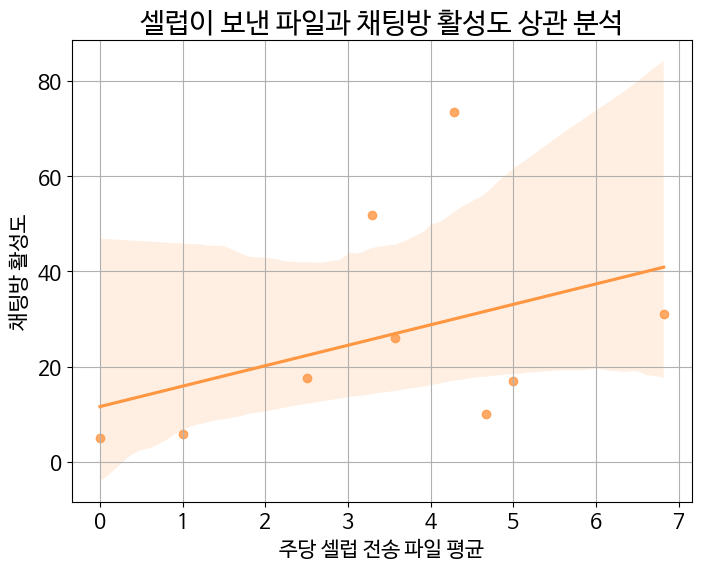

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (8, 6)
sns.regplot(x='file', y='active', data=merged_scatter, color='#FF9642')
# plt.xlim(df['speed'].min()-1, df['speed'].max()+1)

plt.xlabel('주당 셀럽 전송 파일 평균')
plt.ylabel('채팅방 활성도')

plt.title('셀럽이 보낸 파일과 채팅방 활성도 상관 분석',fontsize=20) 
# 셀럽이 파일을 많이 보낼수록 유저 응답률이 높아질까?

plt.grid()
plt.show()

### (2) 대화 시간, 요일
사용 dataframe 이름 : data_contime

1. 시간별 셀럽, 유저 모두의 대화량 분석 그래프 (lineplot)
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 그래프 그리는데 이용한 dataframe : time_sum_df

2. 시간별 셀럽, 유저 대화량 분석 그래프 (lineplot)
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 2개의 겹친 line plot

3. 요일별 대화량 분석 그래프 (pieplot)
  - 그래프 labels : [월, 화, 수, 목, 금, 토, 일]
  - 그래프 안에 들어가는 비율 값 : 요일별 대화 비율 (top10 셀럽 평균)


#### 1. 시간별 셀럽, 유저, 둘 다 대화량 분석 그래프 (lineplot)
대화에 유리한 시간이 있을까?
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 그래프 그리는데 이용한 dataframe : time_sum_df

In [94]:
data_contime = data

# top3 기준으로 나누기 
# top10_list
targets = ['XMSQ', 'VAYA', 'WKDG'] # 1~3위 셀럽
data_contime = data_contime.loc[data_contime['celeb'].isin(targets)]

a = data_contime[['time', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.
a = a.groupby(['celeb', 'time']).count()
a = a.reset_index()
a.head()

,celeb,time,code
0,VAYA,00:00,2
1,VAYA,00:02,1
2,VAYA,00:04,1
3,VAYA,00:05,3
4,VAYA,00:07,1


In [95]:
# 시간으로 바꿔주는 함수
# ex) 01:24 -> 1 (1시에 속하므로)
def convert_time(data):
  for i in range(len(data)):
    for j in range(24):
      if int(data['time'][i][0:2]) == j:
        data['time'][i] = j
        break
  return data

In [96]:
a = convert_time(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [97]:
time_sum_df = a.groupby(['time']).sum()

# 시간별 대화량의 sum과 mean
sum_val = time_sum_df['code'].sum()
mean_val = time_sum_df['code'].mean()
time_sum_df['deviation'] = time_sum_df['code'] - mean_val
time_sum_df = time_sum_df.reset_index()
time_sum_df.head()

,time,code,deviation
0,0,219,-73.958333
1,1,162,-130.958333
2,2,165,-127.958333
3,3,90,-202.958333
4,4,47,-245.958333


In [98]:
time_sum_df = a.groupby(['time']).sum()

# 시간별 대화량의 sum과 mean
sum_val = time_sum_df['code'].sum()
mean_val = time_sum_df['code'].mean()
time_sum_df['deviation'] = time_sum_df['code'] - mean_val
time_sum_df = time_sum_df.reset_index()
time_sum_df.head()

,time,code,deviation
0,0,219,-73.958333
1,1,162,-130.958333
2,2,165,-127.958333
3,3,90,-202.958333
4,4,47,-245.958333


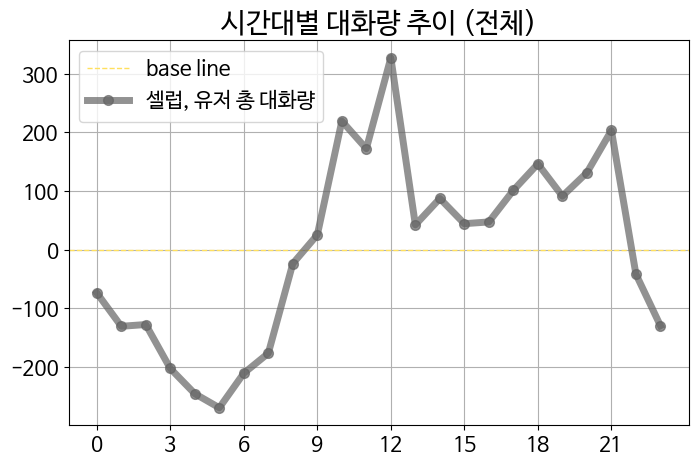

In [100]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.axhline(0 ,label='base line', color='#FFE05D', linewidth=1, linestyle='dashed')
ax.plot(time_sum_df['time'],
         time_sum_df['deviation'],
         '-s', 
         color='#646464',
         marker="o", 
         markersize=7, 
         linewidth=5, 
         alpha=0.7, 
         label='셀럽, 유저 총 대화량')

ax.legend(loc='upper left')

plt.title('시간대별 대화량 추이 (전체)',fontsize=20) ## 타이틀 설정

plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])

plt.grid()
plt.show()

- 보통 대화가 낮시간에 분포 한다는 것을 알수 있다. 
- 보통 방송이나, 여가는 밤에 즐기는데, 역시 간단하게 할 수 있는 메신저라는 장점을 살려서, 낮에 문자를 보내는 것이 좋은 것 같다.

#### 2. 시간별 셀럽, 유저 대화량 분석 그래프 (lineplot)
대화에 유리한 시간이 있을까?
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 2개의 겹친 line plot

In [71]:
# conversation time
data_contime = data

In [72]:
data_contime

,date,time,celeb,code,comments,file,label
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,,1
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,,2
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,,1
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,,1
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,,1
...,...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,,1
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,,1
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,,1
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,,1


In [73]:
data_contime_cel = data_contime[data_contime['celeb']==data_contime['code']]
data_contime_user = data_contime[data_contime['celeb']!=data_contime['code']]

In [74]:
# 셀럽 데이터 처리
data_contime_cel = data_contime_cel[['time', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.
data_contime_cel = data_contime_cel.groupby(['celeb', 'time']).count()
data_contime_cel = data_contime_cel.reset_index()

# 유저 데이터 처리
data_contime_user = data_contime_user[['time', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.
data_contime_user = data_contime_user.groupby(['celeb', 'time']).count()
data_contime_user = data_contime_user.reset_index()

data_contime_cel.head()

,celeb,time,code
0,CJSL,00:01,1
1,CJSL,00:02,1
2,CJSL,00:05,2
3,CJSL,00:06,1
4,CJSL,00:15,1


In [75]:
# 시간으로 바꿔줌 
# ex) 01:24 -> 1 (1시에 속하므로)
data_contime_cel = convert_time(data_contime_cel)
data_contime_user = convert_time(data_contime_user)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [76]:
time_sum_df_cel = data_contime_cel.groupby(['time']).sum()

# 시간별 대화량의 sum과 mean
sum_val = time_sum_df_cel['code'].sum()
mean_val = time_sum_df_cel['code'].mean()
time_sum_df_cel['deviation'] = time_sum_df_cel['code'] - mean_val
time_sum_df_cel = time_sum_df_cel.reset_index()

data_contime_user = data_contime_user.groupby(['time']).sum()
# 시간별 대화량의 sum과 mean
sum_val = data_contime_user['code'].sum()
mean_val = data_contime_user['code'].mean()
data_contime_user['deviation'] = data_contime_user['code'] - mean_val
data_contime_user = data_contime_user.reset_index()

data_contime_user.head()

,time,code,deviation
0,0,262,-61.583333
1,1,163,-160.583333
2,2,156,-167.583333
3,3,85,-238.583333
4,4,42,-281.583333


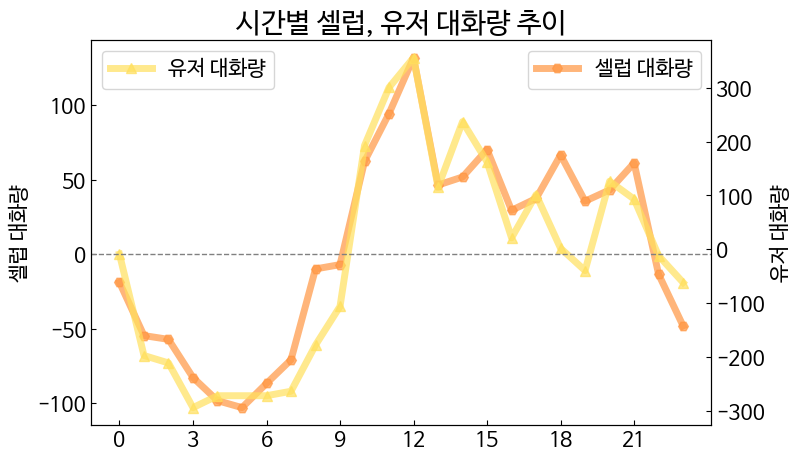

In [77]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['font.size'] = 15
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False


# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(time_sum_df_cel['time'], time_sum_df_cel['deviation'], '-s', color='#FFE05D', marker='^', markersize=7, linewidth=5, alpha=0.7, label='유저 대화량')
# ax1.set_xlabel('날짜')
ax1.set_ylabel('셀럽 대화량')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(data_contime_user['time'], data_contime_user['deviation'], color='#FF9642', marker='H', markersize=7, linewidth=5, alpha=0.7, label='셀럽 대화량')
# ax2.set_ylim(0, 18)
ax2.set_ylabel('유저 대화량')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right') 

ax1.axhline(0 ,label='base line', color='gray', linewidth=1, linestyle='dashed')

# 제목 

plt.xticks([0, 3, 6, 9, 12, 15, 18, 21]) 
plt.title('시간별 셀럽, 유저 대화량 추이',fontsize=20) 
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

plt.show()

- 유저대화량을 보면 오후 6시에 낮아지는 것을 볼 수 있다. 
- 9시부터 12시까지는 가파른 상승폭을 보이다가 점심시간에는 낮아진다. 
- 점심이 끝나면 높아진다. 
- 점심과 저녁 시간 같은 경우는 현생을 사느라 유저(팬)들이 셀럽에 대한 관심도가 낮아지는 경향을 보인다. 

셀럽에게 추천하는 채팅 방법: 
- 아침 인사로 하루를 시작해보자. 
- 하루 중 조금 나른해지는 틈새 시간을 노려보자.
- 하루 일과를 마친 팬들과 대화를 해보자. 


#### 3. 요일별 대화량 분석 그래프 (pieplot)
대화에 유리한 요일이 있을까?
  - 그래프 labels : [월, 화, 수, 목, 금, 토, 일]
  - 그래프 안에 들어가는 비율 값 : 요일별 대화 비율 (top10 셀럽 평균)


In [78]:
# top10 list를 참고하여 아래 targets 변수에 원하는 셀럽의 정보만 볼 수 있어요.
top10_list

['XMSQ',
 'VAYA',
 'WKDG',
 'JLDN',
 'CJSL',
 'LOVM',
 'JOPU',
 'DQZB',
 'OSQR',
 'JSEU']

In [79]:
data_day = data

# top3 기준으로 나누기 
# top10_list
targets = ['XMSQ', 'VAYA', 'WKDG'] # 1~3위 셀럽
data_day = data_day.loc[data_day['celeb'].isin(targets)]

In [80]:
# datetime으로 변경
data_day['date'] = pd.to_datetime(data_day['date'])

# 요일 추가
data_day['day'] = data_day['date'].dt.day_name()

# 요일로 groupby
data_day = data_day.groupby('day').count().reset_index()

# 컬럼 정리
data_day = data_day[['day', 'date']]

# 대화수가 많은 요일 순서대로 sort 
data_day = data_day.sort_values(by=['date'], axis=0, ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


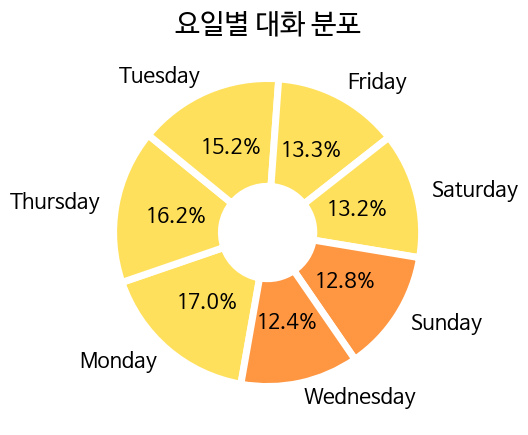

In [102]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ratio = data_day['date']
labels = data_day['day']
colors = ['#FFE05D', '#FFE05D', '#FFE05D', '#FFE05D', '#FFE05D', '#FF9642', '#FF9642']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.rc('font', size=15)  
plt.title('요일별 대화 분포',fontsize=20) 

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (3) 성장률 
날짜에 따른 채팅방 활성도(line plot)와 날짜별 셀럽이 보낸 메세지 양(bar plot) & 유저가 보낸 메세지 양(line plot)
  - 셀럽의 꾸준한 발화가 성장을 이끌까? 
  - 대화의 공백 이후, 대화량이 감소할까? 

#### 1. 날짜에 따른 채팅방 활성도 (line plot)

In [82]:
data_send = data 

# 날짜에 따라 정리 
data_send['date'] = pd.to_datetime(data_send["date"])
data_send = data_send.groupby(['celeb', 'date']).count().reset_index()
data_send = data_send[['celeb', 'date', 'code']]

In [83]:
# df 그룹 나눠주기
groups = data_send.groupby(data_send.celeb)
VAYA = groups.get_group("VAYA")
WKDG = groups.get_group("WKDG")
XMSQ = groups.get_group("XMSQ")
CJSL = groups.get_group("CJSL")
DQZB = groups.get_group("DQZB")
JLDN = groups.get_group("JLDN")
OSQR = groups.get_group("OSQR")
JSEU = groups.get_group("JSEU")
LOVM = groups.get_group("LOVM")
JOPU = groups.get_group("JOPU")

#### 2. 날짜별 셀럽이 보낸 메세지 양 & 유저가 보낸 메세지 양

In [84]:
### 셀럽이 보낸 메세지 양
data_send_cel = data 

# 셀럽이 보낸 메세지만 걸러주기
data_send_cel = data_send_cel[data_send_cel['celeb']==data_send_cel['code']]

In [85]:
# 셀럽 데이터 처리
data_send_cel['date'] = pd.to_datetime(data_send_cel["date"])
data_send_cel = data_send_cel.groupby(['celeb', 'date']).count().reset_index()
data_send_cel = data_send_cel[['date', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.

data_send_cel.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,celeb,code
0,2021-06-12,CJSL,4
1,2021-06-13,CJSL,33
2,2021-06-14,CJSL,8
3,2021-06-15,CJSL,12
4,2021-06-16,CJSL,17


In [86]:
# df 셀럽 별로 분리 
groups2 = data_send_cel.groupby(data_send_cel['celeb'])
VAYA2 = groups2.get_group("VAYA")
WKDG2 = groups2.get_group("WKDG")
XMSQ2 = groups2.get_group("XMSQ")
CJSL2 = groups2.get_group("CJSL")
DQZB2 = groups2.get_group("DQZB")
JLDN2 = groups2.get_group("JLDN")
OSQR2 = groups2.get_group("OSQR")
JSEU2 = groups2.get_group("JSEU")
LOVM2 = groups2.get_group("LOVM")
JOPU2 = groups2.get_group("JOPU")

In [87]:
### 유저가 보낸 메세지 양 
data_send_user = data 

# 유저가 보낸 메세지만 걸러주기
data_send_user = data_send_user[data_send_user['celeb']!=data_send_user['code']]
data_send_user['date'] = pd.to_datetime(data_send_user["date"])
data_send_user = data_send_user.groupby(['celeb', 'date']).count().reset_index()
data_send_user = data_send_user[['date', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.

# df 셀럽 별로 분리
groups3 = data_send_user.groupby(data_send_user['celeb'])
VAYA3 = groups3.get_group("VAYA")
XMSQ3 = groups3.get_group("XMSQ")
WKDG3 = groups3.get_group("WKDG")
CJSL3 = groups3.get_group("CJSL")
DQZB3 = groups3.get_group("DQZB")
JLDN3 = groups3.get_group("JLDN")
OSQR3 = groups3.get_group("OSQR")
JSEU3 = groups3.get_group("JSEU")
LOVM3 = groups3.get_group("LOVM")
JOPU3 = groups3.get_group("JOPU")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### 그래프 두개 합치기

In [88]:
import matplotlib.pyplot as plt
import numpy as np

def draw_plot(celeb_name, celeb_df3, celeb_df2, color1, color2):
  # 1. 기본 스타일 설정
  plt.style.use('default')
  plt.rcParams['figure.figsize'] = (18 ,5)
  plt.rcParams['font.size'] = 15
  plt.rc('font', family='NanumBarunGothic') 
  plt.rcParams['axes.unicode_minus'] = False

  # 3. 그래프 그리기
  fig, ax1 = plt.subplots()

  ax1.plot(celeb_df3['date'], celeb_df3['code'], '-s', color=color1, markersize=7, linewidth=5, alpha=0.7, label='유저 대화량')
  # ax1.set_ylim(0, 18)
  # ax1.set_xlabel('날짜')
  ax1.set_ylabel('셀럽 대화량')
  ax1.tick_params(axis='both', direction='in')

  ax2 = ax1.twinx()
  ax2.bar(celeb_df2['date'], celeb_df2['code'], color=color2, label='셀럽 대화량', width=0.7)
  # ax2.set_ylim(0, 18)
  ax2.set_ylabel('유저 대화량')
  ax2.tick_params(axis='y', direction='in')

  ax1.set_zorder(ax2.get_zorder() + 10)
  ax1.patch.set_visible(False)

  ax1.legend(loc='upper left')
  ax2.legend(loc='upper right')

  # 제목 
  plt.title(f'{celeb_name} 셀럽 대화량에 따른 유저 대화량 추이',fontsize=20) 
  plt.rc('font', family='NanumBarunGothic') 
  plt.rcParams['axes.unicode_minus'] = False

  plt.show()

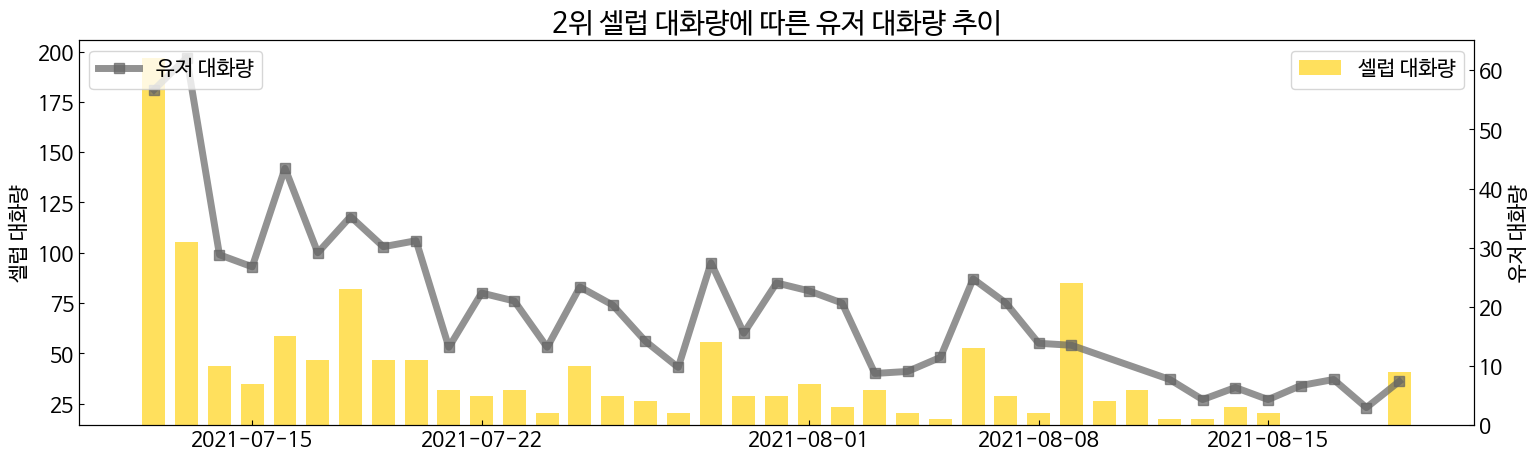

In [89]:
draw_plot('2위', VAYA3, VAYA2, '#646464', '#FFE05D')

- 8월 15일 옆부분을 보면 셀럽이 아예 채팅을 보내지 않은 다음날 셀럽의 채팅에 비해 유저의 채팅이 적었다. 
- 꾸준한 대화가 중요

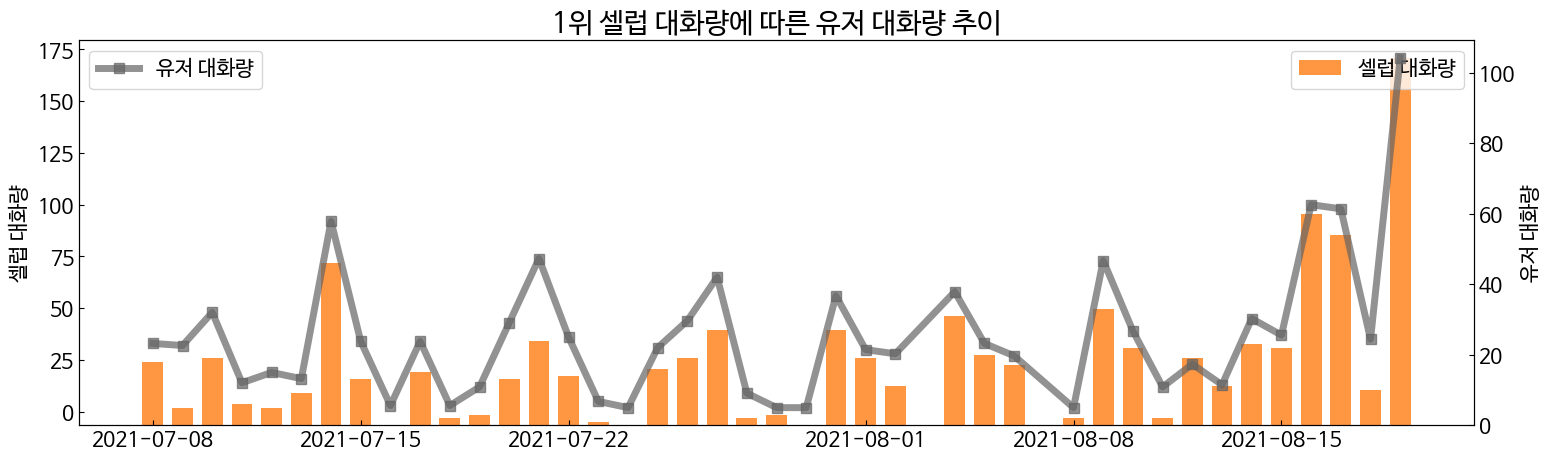

In [90]:
draw_plot('1위', XMSQ3, XMSQ2, '#646464', '#FF9642')

- 셀럽이 이끌어주는 만큼 유저의 대화량도 따라온다는 것을 알 수 있다. 

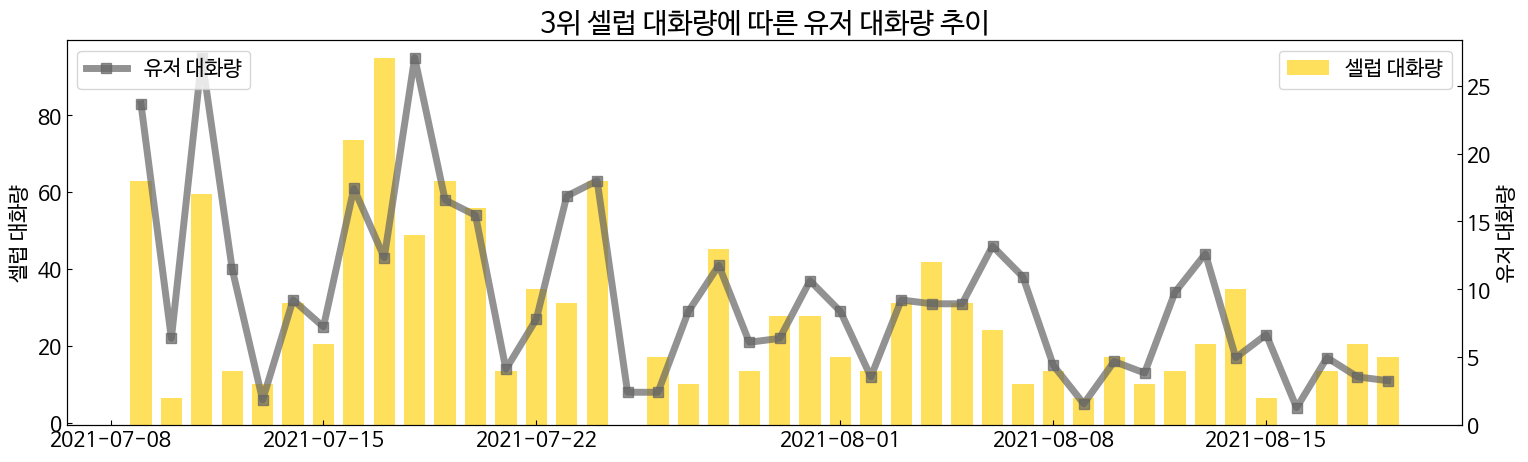

In [91]:
draw_plot('3위', WKDG3, WKDG2, '#646464', '#FFE05D')

- 7월 22일 옆부분을 보면 셀럽이 아예 채팅을 보내지 않은 다음날 셀럽의 채팅에 비해 유저의 채팅이 적었다. 
- 꾸준한 대화가 중요